In [1]:
import numpy as np  
def metric(pred, label):
    with np.errstate(divide='ignore', invalid='ignore'):
        mask = np.not_equal(label, 0)
        mask = mask.astype(np.float32)
        mask /= np.mean(mask)
        mae = np.abs(np.subtract(pred, label)).astype(np.float32)
        wape = np.divide(np.sum(mae), np.sum(label))
        wape = np.nan_to_num(wape * mask)
        rmse = np.square(mae)
        mape = np.divide(mae, label)
        mae = np.nan_to_num(mae * mask)
        mae = np.mean(mae)
        rmse = np.nan_to_num(rmse * mask)
        rmse = np.sqrt(np.mean(rmse))
        mape = np.nan_to_num(mape * mask)
        mape = np.mean(mape)
        
    return mae, rmse, mape

## 进口

In [2]:

import pandas as pd
import numpy as np

column_names = columns = [
    'Primary Shape Plastic', 'Ore (Sand) and Unrolled Products', 'Coal and Lignite', 'Other Agricultural Products',
    'Natural Gas', 'Medicinal Materials and Pharmaceuticals', 'Crude Oil and Refined Products', 'Grains and Edible Oils',
    'Pulp, Paper and Paper Products', 'Automobiles and Spare Parts', 'Electrical Equipment Imports', 'Livestock Products Imports',
    'Equipment and Electromechanical Imports', 'Chemicals Imports', 'Measuring Instruments Imports', 'Others'
]


# Create a sequence of monthly date ranges from January 2005 to February 2023
date_range = pd.date_range(start='2005-01-01', end='2024-02-01', freq='MS')

# Generate random data for the DataFrame (replace with your own data)
data = np.load('/root/autodl-tmp/TFSTL_Upload_Maintenance/data/MYDATA/new_import/flow.npz')['result']

# Create the DataFrame and set the row index to the monthly date range
df_import = pd.DataFrame(data=data, columns=column_names, index=date_range)


In [3]:
import pandas as pd

# 读取 CSV 文件
file_path = '/root/autodl-tmp/TFSTL_Upload_Maintenance/output/import_pred_out/first_label.csv'
import pandas as pd
column_names = [
    'Primary Shape Plastic', 'Ore (Sand) and Unrolled Products', 'Coal and Lignite', 'Other Agricultural Products',
    'Natural Gas', 'Medicinal Materials and Pharmaceuticals', 'Crude Oil and Refined Products', 'Grains and Edible Oils',
    'Pulp, Paper and Paper Products', 'Automobiles and Spare Parts', 'Electrical Equipment Imports', 'Livestock Products Imports',
    'Equipment and Electromechanical Imports', 'Chemicals Imports', 'Measuring Instruments Imports', 'Others'
]

# Define the start and end dates of the date range
start_date = '2023-01-01'
end_date = '2024-01-01'

# Create a sequence of monthly date ranges from May 2022 to February 2023
date_range = pd.date_range(start=start_date, end=end_date, freq='MS')

# Load the data from the CSV file and set the column names and row index
first_label = pd.read_csv(file_path, header=None, names=column_names)

# Set the row index to the monthly date range
first_label.index = date_range



In [4]:
import pandas as pd

# 读取 CSV 文件
file_path = '/root/autodl-tmp/TFSTL_Upload_Maintenance/output/import_pred_out/first_pred.csv'
import pandas as pd

# Define the start and end dates of the date range
start_date = '2023-01-01'
end_date = '2024-01-01'

# Create a sequence of monthly date ranges from May 2022 to February 2023
date_range = pd.date_range(start=start_date, end=end_date, freq='MS')

# Load the data from the CSV file and set the column names and row index
first_pred = pd.read_csv(file_path, header=None, names=column_names)

# Set the row index to the monthly date range
first_pred.index = date_range

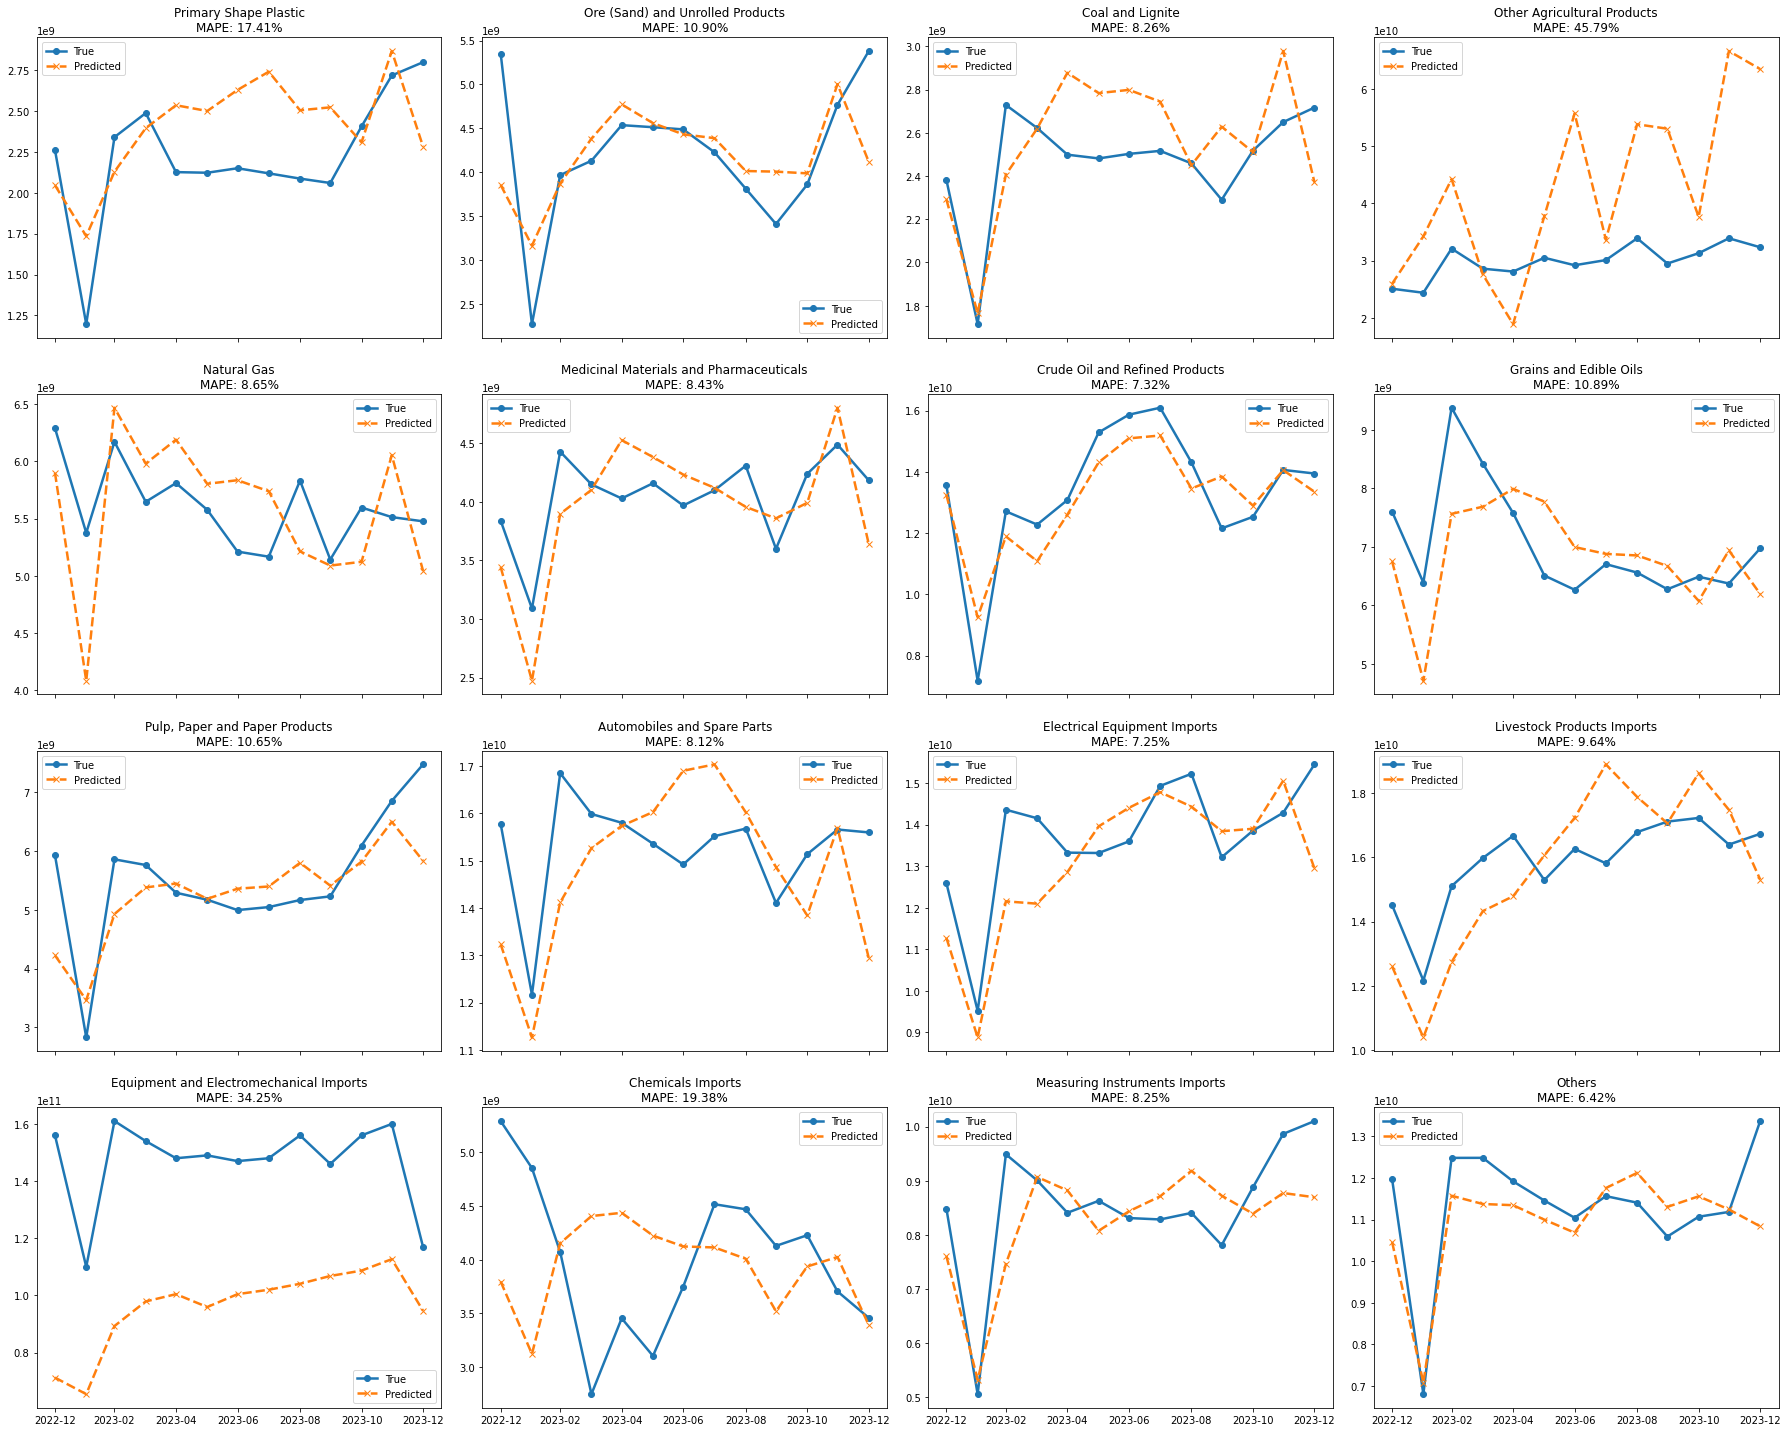

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import os

# 设置全局参数确保图表在论文中的清晰度
plt.rcParams.update({'font.size': 14, 'lines.linewidth': 2.5})

# 定义图表的行数和列数
n_rows, n_cols = 4,4

# 计算总图表数并初始化图表计数器
total_plots = len(first_pred.columns)
plot_count = 0

# 创建一个大的图形和子图阵列
fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 20), sharex=True)

# 遍历每一列数据
for row in range(n_rows):
    for col in range(n_cols):
        if plot_count < total_plots:
            ax = axes[row, col]
            column_name = first_pred.columns[plot_count]
            ax.plot(first_pred.index, first_label[column_name], label='True', marker='o')
            ax.plot(first_pred.index, first_pred[column_name], label='Predicted', linestyle='--', marker='x')
            
            # 使用metric函数计算指标
            mae, rmse, mape= metric(first_pred[column_name].to_numpy(), first_label[column_name].to_numpy())
            
            ax.set_title(f'{column_name}\nMAPE: {mape*100:.2f}%')
            ax.legend()
            
            # 设置x轴日期格式和间隔
            ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # 每两个月显示一次
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # 设置日期格式
            
            plot_count += 1
        else:
            axes[row, col].axis('off')  # 隐藏多余的子图

# 调整布局
plt.tight_layout()

# 保存整个图表
# output_dir = '/root/autodl-tmp/TFSTL_Upload_Maintenance/result_check_and_visualize/visualize_output'
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)
# output_file = os.path.join(output_dir, 'export_comparison_metrics.eps')
# plt.savefig(output_file, format='eps')

plt.show()


## 出口

In [6]:
import pandas as pd
import numpy as np

column_names = [
    'Agricultural Products', 'Bags and Similar Containers', 'Ceramic Products Export', 'Footwear Export',
    'Pulp, Paper and Paper Products Export', 'Equipment and Electromechanical Exports',
    'Chemicals Export', 'Measuring Instruments Export', 'Apparel and Clothing Accessories', 'Steel Products',
    'Furniture and Parts', 'Electrical Equipment', 'Electrical Appliances', 'Automobiles and Spare Parts',
    'Others', 'Refined Oil Products', 'Plastic Products', 'Textiles'
]


# Create a sequence of monthly date ranges from January 2005 to February 2023
date_range = pd.date_range(start='2005-01-01', end='2024-02-01', freq='MS')

# Generate random data for the DataFrame (replace with your own data)
data = np.load('/root/autodl-tmp/TFSTL_Upload_Maintenance/data/MYDATA/new_export/flow.npz')['result']

# Create the DataFrame and set the row index to the monthly date range
df_export = pd.DataFrame(data=data, columns=column_names, index=date_range)


In [7]:
import pandas as pd

# 读取 CSV 文件
file_path = '/root/autodl-tmp/TFSTL_Upload_Maintenance/output/export_pred_out/first_label.csv'
import pandas as pd
column_names = [
    'Agricultural Products', 'Bags and Similar Containers', 'Ceramic Products Export', 'Footwear Export',
    'Pulp, Paper and Paper Products Export', 'Equipment and Electromechanical Exports',
    'Chemicals Export', 'Measuring Instruments Export', 'Apparel and Clothing Accessories', 'Steel Products',
    'Furniture and Parts', 'Electrical Equipment', 'Electrical Appliances', 'Automobiles and Spare Parts',
    'Others', 'Refined Oil Products', 'Plastic Products', 'Textiles'
]


# Define the start and end dates of the date range
start_date = '2023-01-01'
end_date = '2024-01-01'

# Create a sequence of monthly date ranges from May 2022 to February 2023
date_range = pd.date_range(start=start_date, end=end_date, freq='MS')

# Load the data from the CSV file and set the column names and row index
first_label = pd.read_csv(file_path, header=None, names=column_names)

# Set the row index to the monthly date range
first_label.index = date_range



In [8]:
import pandas as pd

# 读取 CSV 文件
file_path = '/root/autodl-tmp/TFSTL_Upload_Maintenance/output/export_pred_out/first_pred.csv'
import pandas as pd

# Define the start and end dates of the date range
start_date = '2023-01-01'
end_date = '2024-01-01'

# Create a sequence of monthly date ranges from May 2022 to February 2023
date_range = pd.date_range(start=start_date, end=end_date, freq='MS')

# Load the data from the CSV file and set the column names and row index
first_pred = pd.read_csv(file_path, header=None, names=column_names)

# Set the row index to the monthly date range
first_pred.index = date_range

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


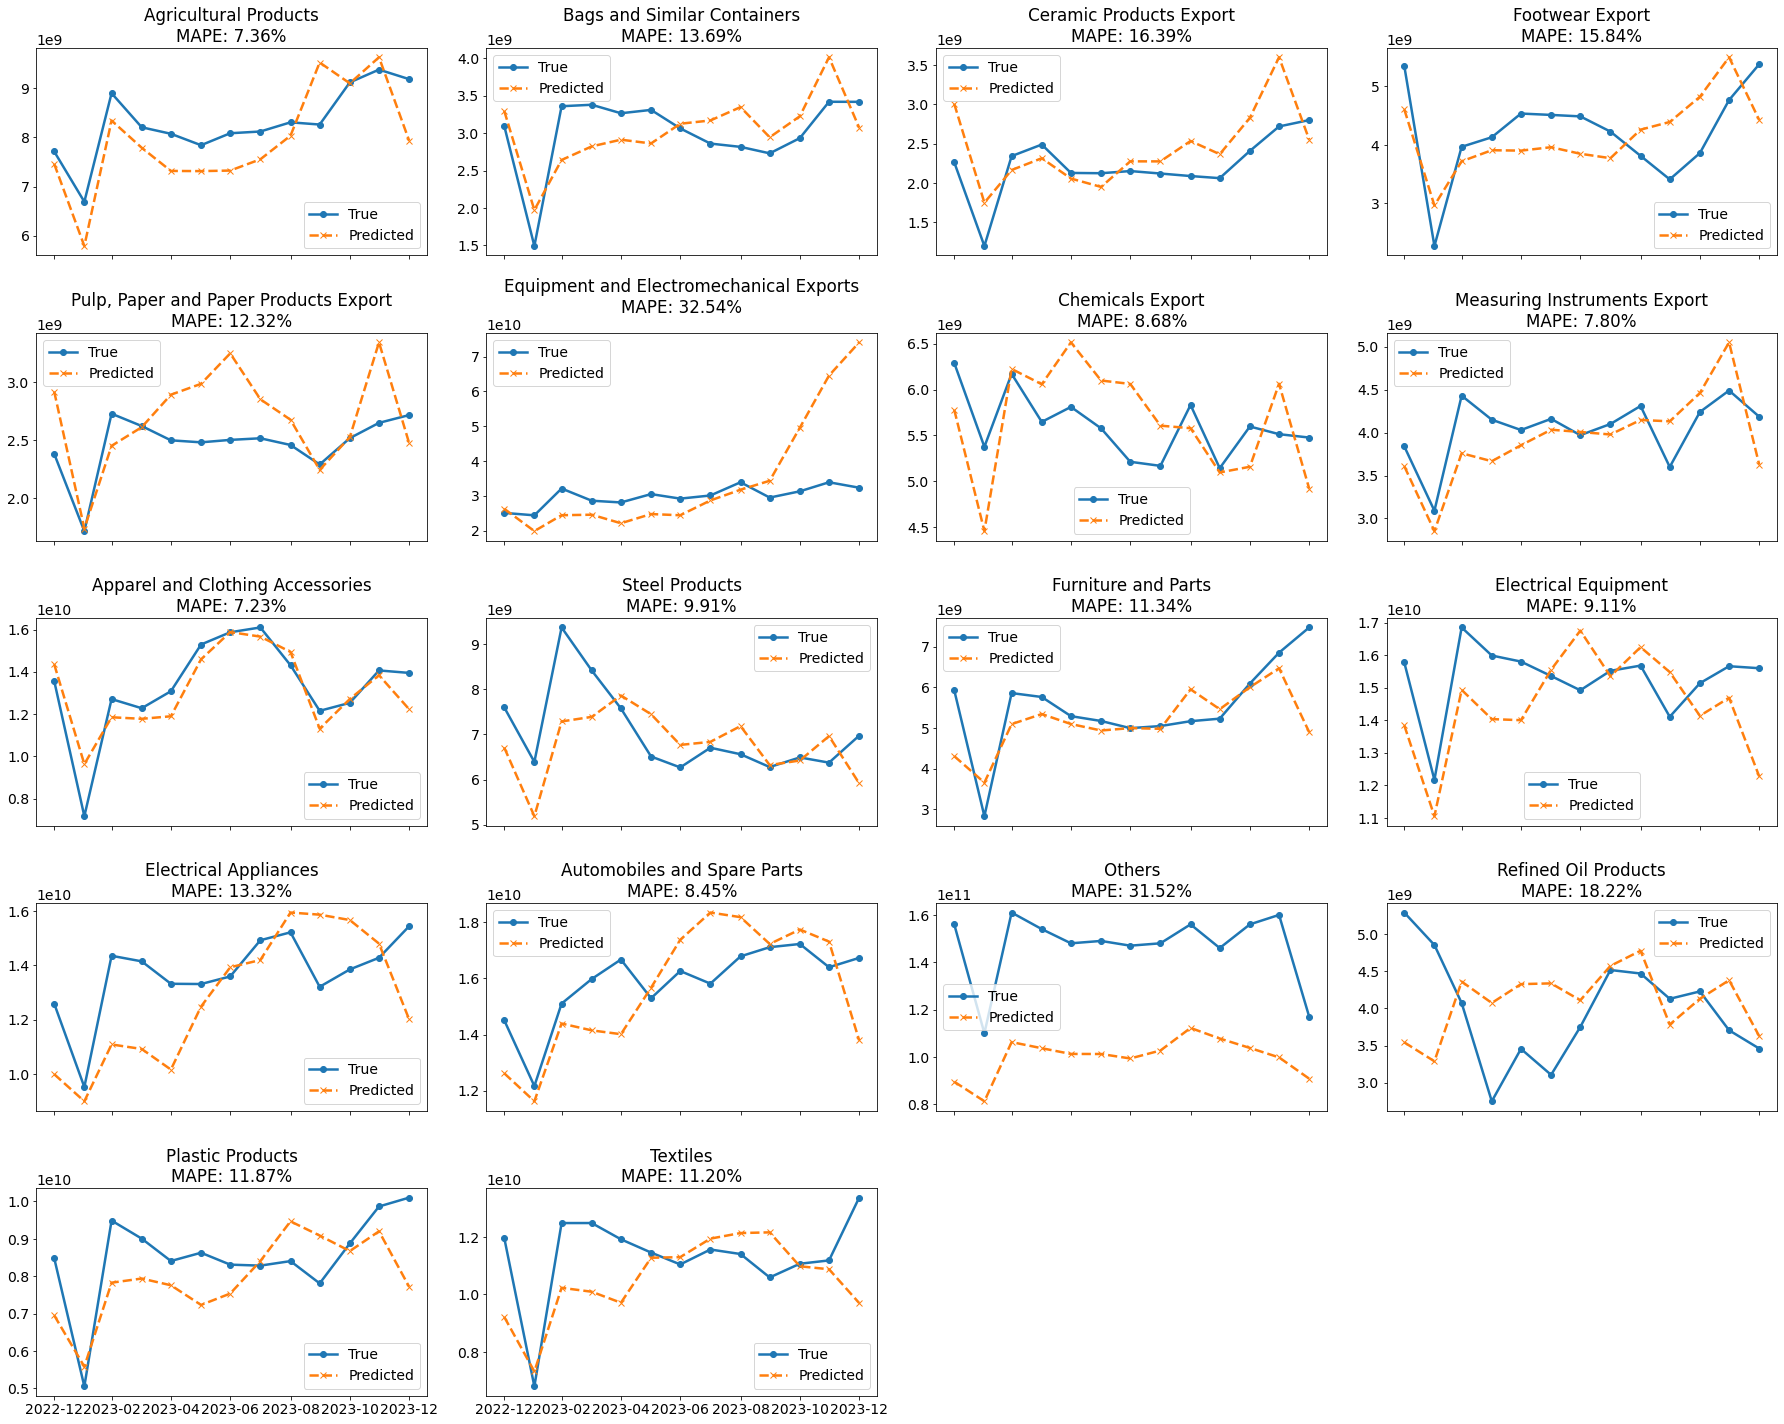

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import os

# 设置全局参数确保图表在论文中的清晰度
plt.rcParams.update({'font.size': 14, 'lines.linewidth': 2.5})

# 定义图表的行数和列数
n_rows, n_cols = 5,4

# 计算总图表数并初始化图表计数器
total_plots = len(first_pred.columns)
plot_count = 0

# 创建一个大的图形和子图阵列
fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 20), sharex=True)

# 遍历每一列数据
for row in range(n_rows):
    for col in range(n_cols):
        if plot_count < total_plots:
            ax = axes[row, col]
            column_name = first_pred.columns[plot_count]
            ax.plot(first_pred.index, first_label[column_name], label='True', marker='o')
            ax.plot(first_pred.index, first_pred[column_name], label='Predicted', linestyle='--', marker='x')
            
            # 使用metric函数计算指标
            mae, rmse, mape = metric(first_pred[column_name].to_numpy(), first_label[column_name].to_numpy())
            
            ax.set_title(f'{column_name}\nMAPE: {mape*100:.2f}%')
            ax.legend()
            
            # 设置x轴日期格式和间隔
            ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # 每两个月显示一次
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # 设置日期格式
            
            plot_count += 1
        else:
            axes[row, col].axis('off')  # 隐藏多余的子图

# 调整布局
plt.tight_layout()

# 保存整个图表
output_dir = '/root/autodl-tmp/TFSTL_Upload_Maintenance/result_check_and_visualize/visualize_output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
output_file = os.path.join(output_dir, 'export_comparison_metrics.eps')
plt.savefig(output_file, format='eps')

plt.show()
